In [99]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import tsfresh 
import sklearn
from plotnine import *
import plotnine as p9
import seaborn as sns

In [83]:
with open('data100.pk', 'rb') as handle:
    data = pickle.load(handle)

In [84]:
data

,MeetTijd,HR(bpm),SpO2(%),NIBP(mmHg),IcNaOk,Length_MeetTijd,Percentage HR nan,Percentage SpO2 nan,Percentage NIBP nan
10,"[15:06:54, 15:07:54, 15:08:54, 15:09:55, 15:10...","[51, 53, 52, 53, 52, 55, 53, 56, 60, 50, 50, 5...","[92.5, 94, 92, 93, 93, 92, 92, 92, 93, 98, 97,...","[156, 156, 156, 158, 158, 158, 157, 157, 157, ...",0.0,151,0.0,0.0,0.0
22,"[10:26:49, 10:27:49, 10:28:49, 10:29:50, 10:32...","[83, 90, 85, 89, 87, 85, 89, 84, 89, 84, 82, 9...","[98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 9...","[154, 154, 154, 154, 152, 152, 152, 131, 131, ...",0.0,90,0.0,0.0,0.0
108,"[08:31:20, 08:32:21, 08:33:21, 08:34:21, 08:35...","[63, 67, 67, 102, 99, 98, 80, 81, 76, 76, 94, ...","[98, 99, 99, 99, 99, 99, 98, 98, 98, 98, 98, 9...","[160, 160, 160, 145, 145, 145, 174, 174, 174, ...",0.0,128,0.0,0.0,0.0
229,"[11:30:09, 11:31:10, 11:32:11, 11:33:11, 11:34...","[61, 60, 56, 61, 61, 62, 62, 68, 68, 62, 60, 6...","[99, 98.5, 99, 99, 98, 99, 98.5, 99, 98.5, 96,...","[139, 134, 134, 134, 134, 134, 129, 129, 129, ...",0.0,106,0.0,0.0,0.0
240,"[15:07:27, 15:08:27, 15:09:28, 15:10:28, 15:11...","[56, 55, 54, 54, 54, 55, 56, 47, 43, 46, 44, 4...","[95, 95, 95, 95, 96.5, 96.5, 99, 99, 99, 99, 9...","[130, 130, 130, 130, 136, 136, 136, 136, 136, ...",0.0,187,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6557,"[19:07:11, 19:08:12, 19:09:13, 19:10:14, 19:11...","[71, 72, 111, 178, 90, 79, 211, 83, 84, 81, 82...","[96, 95, 95.5, 97, 95, 95, 94.5, 93, 95, 95, 9...","[222, 208, 208, 208, 208, 208, 208, 208, 202, ...",1.0,50,0.0,0.0,0.0
6631,"[20:04:42, 20:05:12, 20:05:43, 20:06:13, 20:06...","[77, 90, 86, 80, 87, 93, 93, 108, 87, 77, 76, ...","[100, 100, 100, 100, 100, 100, 100, 100, 100, ...","[141, 141, 141, 141, 141, 141, 138, 138, 138, ...",1.0,88,0.0,0.0,0.0
7284,"[14:34:08, 14:34:38, 14:35:09, 14:35:39, 14:36...","[92, 92, 92, 92, 92, 83, 92, 92, 96, 98, 91, 9...","[100, 100, 100, 100, 100, 100, 100, 100, 100, ...","[141, 141, 141, 141, 141, 146, 146, 146, 146, ...",1.0,149,0.0,0.0,0.0
7865,"[18:43:29, 18:44:00, 18:44:30, 18:45:01, 18:45...","[94, 86, 93, 94, 90, 91, 94, 90, 90, 89, 86, 8...","[93, 95, 95, 94, 95, 94, 93, 93, 100, 100, 100...","[164, 164, 164, 164, 164, 164, 164, 164, 164, ...",1.0,139,0.0,0.0,0.0


In [85]:
data.sort_values(by=['Length_MeetTijd'], ascending=True).head(10)

,MeetTijd,HR(bpm),SpO2(%),NIBP(mmHg),IcNaOk,Length_MeetTijd,Percentage HR nan,Percentage SpO2 nan,Percentage NIBP nan
2182,"[13:19:23, 13:20:24, 13:21:24, 13:22:25, 13:23...","[66, 63, 62, 61, 60, 60, 60, 60]","[92, 94, 94.5, 97, 96, 96, 95, 97]","[141, 127, 127, 127, 123, 123, 123, 122]",0.0,8,0.0,0.0,0.0
3459,"[22:02:21, 22:03:21, 22:04:22, 22:05:23, 22:06...","[84, 110, 154, 113, 138, 94, 68, 69, 70, 84, 75]","[94, 95, 99, 87, 99, 99, 99, 99, 99, 99, 99]","[201, 201, 139, 139, 139, 161, 161, 151, 151, ...",1.0,11,0.0,0.0,0.0
458,"[20:27:56, 20:28:56, 20:29:57, 20:30:57, 20:31...","[69, 67, 71, 117, 83, 78, 73, 70, 67, 67, 89, ...","[98, 98, 98, 79, 81, 93, 99, 99, 99, 99, 99, 9...","[142, 142, 142, 142, 142, 142, 142, 142, 142, ...",1.0,13,0.0,0.0,0.0
5991,"[13:03:20, 13:04:21, 13:05:22, 13:06:22, 13:07...","[80, 96, 84, 81, 75, 77, 82, 81, 79, 86, 78, 8...","[96.21, 95.02, 96.56, 96.45, 96.98, 95.62, 96....","[137, 137, 141, 141, 141, 135, 135, 135, 132, ...",0.0,19,0.0,0.0,0.0
5086,"[20:34:07, 20:35:08, 20:36:09, 20:37:10, 20:38...","[99, 90, 83, 78, 71, 70, 63, 68, 69, 68, 69, 6...","[98.5, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98,...","[164, 164, 164, 131, 131, 131, 129, 129, 129, ...",1.0,20,0.0,0.0,0.0
3873,"[21:35:21, 21:36:22, 21:37:23, 21:38:24, 21:39...","[95, 91, 90, 92, 87, 85, 89, 98, 64, 61, 62, 6...","[95, 97, 95, 91.5, 99, 92, 99, 99, 99, 99, 99,...","[198, 198, 198, 183, 193, 193, 193, 116, 116, ...",1.0,21,0.0,0.0,0.0
2853,"[21:19:08, 21:20:09, 21:21:09, 21:22:09, 21:23...","[93, 98, 100, 94, 96, 100, 94, 78, 70, 70, 68,...","[95.34, 95.06, 95.39, 95.04, 95.08, 95.54, 98....","[166, 165, 165, 165, 159, 159, 159, 126, 126, ...",1.0,22,0.0,0.0,0.0
1751,"[17:20:04, 17:21:05, 17:22:05, 17:23:06, 17:24...","[103, 101, 103, 98, 98, 101, 101, 102, 99, 107...","[97.57, 97.41, 96.85, 98.06, 97.46, 98.8, 98.2...","[122, 126, 126, 126, 130, 130, 130, 130, 118, ...",1.0,33,0.0,0.0,0.0
3510,"[14:02:42, 14:03:43, 14:04:43, 14:05:44, 14:06...","[105, 111, 116, 79, 84, 100, 81, 78, 79, 81, 7...","[97, 97.33, 96.08, 95.08, 98.5, 98.5, 99, 97, ...","[124, 124, 124, 124, 124, 158, 153, 153, 153, ...",0.0,37,0.0,0.0,0.0
4675,"[14:06:54, 14:07:55, 14:08:56, 14:09:56, 14:10...","[55, 50, 66, 52, 57, 57, 48, 46, 63, 42, 126, ...","[98, 97, 95, 95, 91.5, 91, 91, 99, 99, 99, 98,...","[136, 136, 136, 136, 130, 130, 130, 135, 135, ...",0.0,38,0.0,0.0,0.0


In [89]:
instance1 = data.loc[3510]
instance2 = data.loc[5075]
instance3 = data.loc[6535]
instance4 = data.loc[5216]

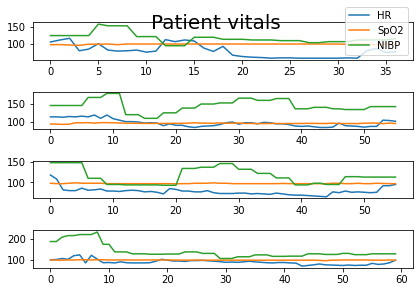

In [90]:
fig, axes = plt.subplots(nrows=4, ncols=1)
plt.suptitle('Patient vitals',fontsize=20)
fig.tight_layout()
df1 = pd.DataFrame({'Time':instance1['MeetTijd'], 'HR': instance1['HR(bpm)'],'SpO2': instance1['SpO2(%)'],'NIBP': instance1['NIBP(mmHg)']},dtype=float)
df2 = pd.DataFrame({'Time':instance2['MeetTijd'], 'HR': instance2['HR(bpm)'],'SpO2': instance2['SpO2(%)'],'NIBP': instance2['NIBP(mmHg)']},dtype=float)
df3 = pd.DataFrame({'Time':instance3['MeetTijd'], 'HR': instance3['HR(bpm)'],'SpO2': instance3['SpO2(%)'],'NIBP': instance3['NIBP(mmHg)']},dtype=float)
df4 = pd.DataFrame({'Time':instance4['MeetTijd'], 'HR': instance4['HR(bpm)'],'SpO2': instance4['SpO2(%)'],'NIBP': instance4['NIBP(mmHg)']},dtype=float)
df1['Time'] = df1['Time'].astype(str)
df2['Time'] = df2['Time'].astype(str)
df3['Time'] = df3['Time'].astype(str)
df4['Time'] = df4['Time'].astype(str)
df1.set_index('Time')
df2.set_index('Time')
df3.set_index('Time')
df4.set_index('Time')


df1.plot(ax=axes[0])
df2.plot(ax=axes[1],legend=None)
df3.plot(ax=axes[2],legend=None)
df4.plot(ax=axes[3],legend=None)

In [91]:
df1.set_index('Time')

,HR,SpO2,NIBP
Time,,,
14:02:42,105.0,97.00,124.0
14:03:43,111.0,97.33,124.0
14:04:43,116.0,96.08,124.0
14:05:44,79.0,95.08,124.0
14:06:45,84.0,98.50,124.0
14:07:46,100.0,98.50,158.0
14:08:47,81.0,99.00,153.0
14:09:48,78.0,97.00,153.0
14:10:49,79.0,99.00,153.0


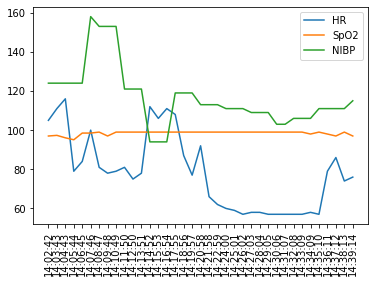

In [7]:
ax1 = df1.plot(xticks=df1.index);
ax1.set_xticklabels(df1['Time'])
plt.xticks(rotation=90);

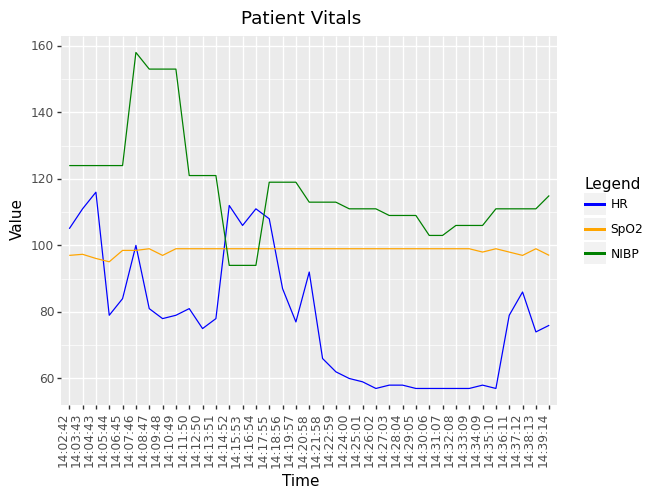

In [90]:
plt = (ggplot() + 
 p9.geom_line(data=df1, mapping=p9.aes(x='Time', y='HR', color="'blue'", group = 1)) +
 p9.geom_line(data=df1, mapping=p9.aes(x='Time', y='SpO2', color="'orange'", group = 1)) +
 p9.geom_line(data=df1, mapping=p9.aes(x='Time', y='NIBP', color="'green'", group = 1)) +
 p9.xlab('Time')+
 p9.ylab('Value')+
 p9.labs(title = 'Patient Vitals')+
 p9.theme(axis_text_x=element_text(rotation=90, hjust=1))+
 p9.scale_color_identity(guide='legend',
                               name='Legend',
                               breaks=['blue','orange','green'],
                               labels=['HR','SpO2','NIBP'])).draw();
                               


In [94]:
df1.set_index('Time')

,HR,SpO2,NIBP
Time,,,
14:02:42,105.0,97.00,124.0
14:03:43,111.0,97.33,124.0
14:04:43,116.0,96.08,124.0
14:05:44,79.0,95.08,124.0
14:06:45,84.0,98.50,124.0
14:07:46,100.0,98.50,158.0
14:08:47,81.0,99.00,153.0
14:09:48,78.0,97.00,153.0
14:10:49,79.0,99.00,153.0


In [95]:
df1.corr()

,HR,SpO2,NIBP
HR,1.000000,-0.329968,0.178710
SpO2,-0.329968,1.000000,-0.255373
NIBP,0.178710,-0.255373,1.000000


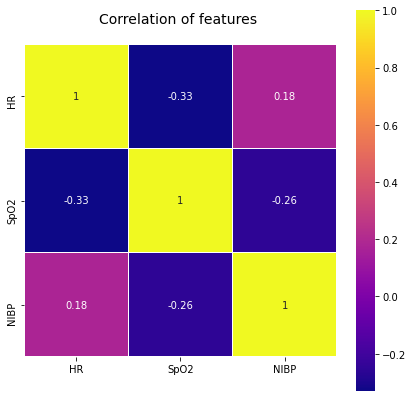

In [105]:
sns.colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features ',y=1.05,size=14)
sns.heatmap(df1.corr(),linewidths=0.1,vmax=1.0,square=True,cmap = sns.colormap,
           linecolor='white',annot=True)
plt.savefig('cor.png')

In [96]:
plt.savefig('test.png', bbox_inches='tight')

In [ ]:
with open('clean_data.pk', 'rb') as handle:
    dataFull = pickle.load(handle)

In [103]:
SP= np.array(np.hstack(dataFull['SpO2(%)']),dtype=float)
HR = np.array(np.hstack(dataFull['HR(%)']),dtype=float)

In [ ]:
tf=tsfresh.extract_features(data)

In [5]:
with open('clean_data.pk', 'rb') as handle:
    all_data = pickle.load(handle)

In [22]:
all_data.describe()

,IcNaOk,Length_MeetTijd,Percentage HR nan,Percentage SpO2 nan,Percentage NIBP nan
count,12735.000000,12735.000000,12735.000000,12735.000000,12735.000000
mean,0.118885,230.424656,0.019932,0.036668,0.375837
std,0.323666,169.903734,0.062950,0.064138,0.402615
min,0.000000,5.000000,0.000000,0.000000,0.000000
25%,0.000000,114.000000,0.002240,0.010000,0.023622
50%,0.000000,183.000000,0.009346,0.020619,0.094340
75%,0.000000,295.000000,0.018868,0.041428,0.864804
max,1.000000,1576.000000,1.000000,1.000000,1.000000


In [50]:
SP1= np.array(np.hstack( all_data['SpO2(%)']),dtype=float)
HR1 = np.array(np.hstack( all_data['HR(bpm)']),dtype=float)
NIBP1 = np.array(np.hstack( all_data['NIBP(mmHg)']),dtype=float)

In [54]:
d = {'SP': SP1, 'HR': HR1, 'NIBP':NIBP1}
df = pd.DataFrame(data=d)
dfSet = df.dropna()

In [76]:
dfSet

,SP,HR,NIBP
16,94.0,78.0,170.0
17,94.5,81.0,170.0
18,95.0,78.0,170.0
19,94.0,81.0,139.0
20,93.0,80.0,139.0
...,...,...,...
2934415,96.0,62.0,160.0
2934425,100.0,74.0,165.0
2934431,99.0,72.0,157.0
2934445,100.0,73.0,189.0


In [80]:
pat = dfSet.iloc[0]

In [81]:
pat

SP       94.0
HR       78.0
NIBP    170.0
Name: 16, dtype: float64

In [77]:
dfSet.corr()

,SP,HR,NIBP
SP,1.000000,-0.02121,-0.028786
HR,-0.021210,1.00000,0.072280
NIBP,-0.028786,0.07228,1.000000


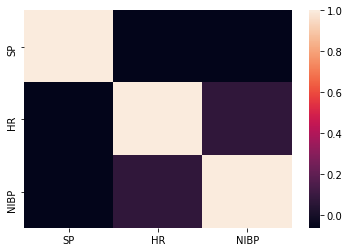

In [66]:
sns.heatmap(ds.corr())

In [ ]:
SP = SP[~np.isnan(SP)]
HR = HR[~np.isnan(HR)]
NIBP = NIBP[~np.isnan(NIBP)]

In [43]:
 df[1:100]

,SP,HR,NIBP
1,NaN,NaN,143.0
2,NaN,NaN,143.0
3,NaN,NaN,143.0
4,NaN,NaN,143.0
5,NaN,NaN,143.0
...,...,...,...
95,92.0,56.0,120.0
96,95.0,49.0,120.0
97,93.0,50.0,120.0
98,92.0,49.0,111.0


In [ ]:
sns.heatmap(corr)

In [11]:
SP = SP[~np.isnan(SP)]
HR = HR[~np.isnan(HR)]
NIBP = NIBP[~np.isnan(NIBP)]

In [21]:
max(SP)

9997.0

In [19]:
import seaborn as sns


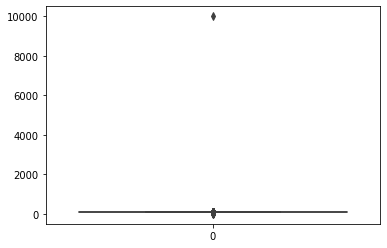

In [20]:
sns.boxplot(data = SP)

In [17]:
type(SP)

numpy.ndarray

In [18]:
plt = (ggplot() + 
 p9.geom_boxplot(data=all_data, mapping=p9.aes(x='SP', y='SP', color="'blue'", group = 1)) +
 p9.geom_boxplot(data=all_data, mapping=p9.aes(x='HR', y='HR', color="'orange'", group = 1)) +
 p9.geom_boxplot(data=all_data, mapping=p9.aes(x='NIBP', y='NIBP', color="'green'", group = 1)) +
 p9.xlab('Time')+
 p9.ylab('Value')+
 p9.labs(title = 'Patient Vitals')+
 p9.theme(axis_text_x=element_text(rotation=90, hjust=1))+
 p9.scale_color_identity(guide='legend',
                               name='Legend',
                               breaks=['blue','orange','green'],
                               labels=['HR','SpO2','NIBP'])).draw();
                               

PlotnineError: "The 'x' mapping: 'SP' produced a value of type '<class 'numpy.ndarray'>',but only single items and lists/arrays can be used. (original error: Length of values (2840583) does not match length of index (12735))"

In [11]:
HR = np.hstack(all_data['HR(bpm)'])
HR = HR[~np.isnan(HR.astype(float))]

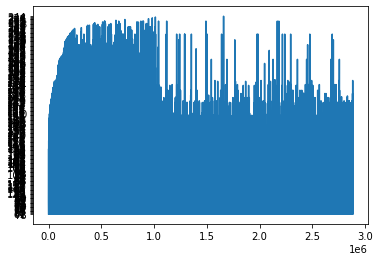

In [23]:
HR

In [16]:
len(HR)

2883822

In [11]:
data.index

Int64Index([  10,   22,  108,  229,  240,  453,  458,  821,  897, 1070, 1191,
            1248, 1565, 1611, 1736, 1751, 1984, 2019, 2064, 2182, 2211, 2353,
            2495, 2588, 2598, 2611, 2853, 2906, 2927, 2967, 3003, 3115, 3220,
            3343, 3379, 3459, 3467, 3510, 3520, 3544, 3562, 3719, 3873, 3894,
            4296, 4526, 4596, 4675, 4714, 4782, 4877, 4929, 4962, 4977, 5075,
            5086, 5216, 5278, 5604, 5651, 5702, 5792, 5868, 5981, 5991, 6013,
            6189, 6535, 6557, 6631, 7284, 7865, 8156],
           dtype='int64')

In [18]:
max(HR)

'99'

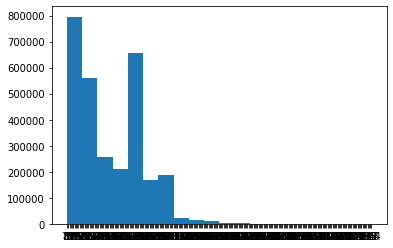

In [13]:
plt.hist(HR, bins=20);

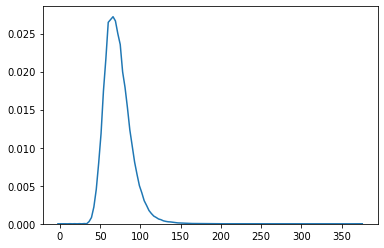

In [14]:
sns.kdeplot(HR.astype(float),);

In [15]:
HR.

SyntaxError: invalid syntax (<ipython-input-15-4afd467fcdb8>, line 1)